In [102]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [382]:
from flask import Flask, redirect, url_for, request
app = Flask(__name__)
st=""
@app.route('/',methods = ['POST', 'GET'])
def login():

    if request.method == 'POST':
        st = request.form['nm']
        return user
    else:
        st = request.args.get('nm')
        return user

if __name__ == '__main__':
    app.run()


 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
[2019-01-23 02:08:25,170] ERROR in app: Exception on / [GET]
Traceback (most recent call last):
  File "C:\Users\kartik\Anaconda3\lib\site-packages\flask\app.py", line 2292, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\kartik\Anaconda3\lib\site-packages\flask\app.py", line 1815, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\Users\kartik\Anaconda3\lib\site-packages\flask\app.py", line 1718, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "C:\Users\kartik\Anaconda3\lib\site-packages\flask\_compat.py", line 35, in reraise
    raise value
  File "C:\Users\kartik\Anaconda3\lib\site-packages\flask\app.py", line 1813, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\Users\kartik\Anaconda3\lib\site-packages\flask\app.py", line 1799, in dispatch_request
    return self.view_functions[rule.endpoint](**req.view_args)
  File "<ipython-input-3

In [383]:
from base64 import b64decode

data_uri = st
header, encoded = data_uri.split(",", 1)
data = b64decode(encoded)

with open("image.png", "wb") as f:
    f.write(data)

ValueError: not enough values to unpack (expected 2, got 1)

In [ ]:
img=cv2.imread('image.png',0)
plt.imshow(img,cmap='gray')

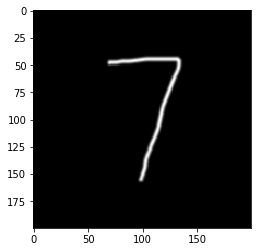

In [371]:
img=cv2.GaussianBlur(img,(5,5),0)
plt.imshow(img,cmap='gray')

In [372]:
kernel = np.ones((5,5),np.uint8)
erosion = cv2.dilate(img,kernel,iterations = 1)

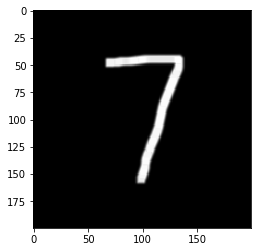

In [373]:
plt.imshow(erosion,cmap='gray')

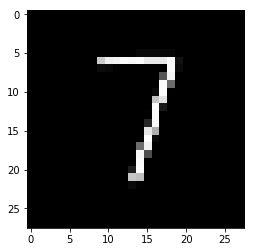

In [374]:
x1=cv2.resize(erosion,(28,28))
plt.imshow(x1,cmap='gray')

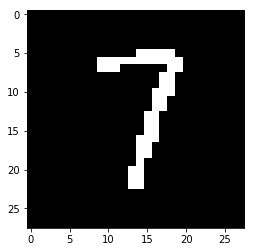

In [375]:
ret,t1 = cv2.threshold(x1,0,255,cv2.THRESH_BINARY)
plt.imshow(t1,cmap='gray')

In [376]:
cv2.imwrite('mod.png',t1)

True

In [377]:
#img=cv2.imread('mod.png')
#norm_image = cv2.normalize(img, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)

from PIL import Image as l
o=l.open('mod.png')

#img.shape
from torchvision import transforms
m1=transforms.Grayscale().__call__(o)
m=transforms.ToTensor().__call__(m1)

#m=torch.from_numpy(img)
print(m.shape)
m=m.view(1, -1)
print(m.shape)
x=torch.load('model_full.pt')
#print(x)
with torch.no_grad():
    output = x(m)
    _, pred = torch.max(output, 1)

print(pred)

torch.Size([1, 28, 28])
torch.Size([1, 784])
tensor([7])


In [378]:
print(output)

tensor([[-2.2835,  2.9951,  4.4653,  3.7731, -4.7450, -5.0878, -6.4866,  8.7106,
         -1.0013,  0.9084]])


In [379]:
values=output.numpy()
#values

In [380]:
val=np.exp(values) / np.sum(np.exp(values), axis=1)
#val

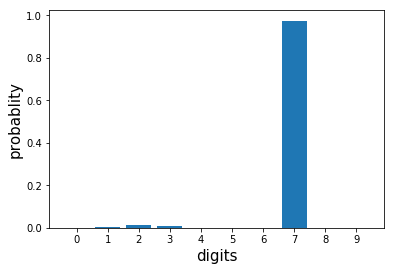

In [381]:
index = np.arange(len(val[0]))
plt.bar(index,val[0])
plt.xlabel('digits', fontsize=15)
plt.ylabel('probablity', fontsize=15)
plt.xticks(index)
plt.show()